In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shovi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df_train = pd.read_csv("train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [9]:
df_test = pd.read_csv("test_data.txt", sep=':::', names=[ 'Title', 'Description'], engine='python')
df_test

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [10]:
df_train.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [11]:
df_test.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [12]:
df_train.shape

(54214, 3)

In [13]:
df_test.shape

(54200, 2)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [16]:
df_train.duplicated().sum()

0

In [17]:
df_test.duplicated().sum()

0

In [18]:
df_train['Genre'].value_counts()

Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

# CountPlot

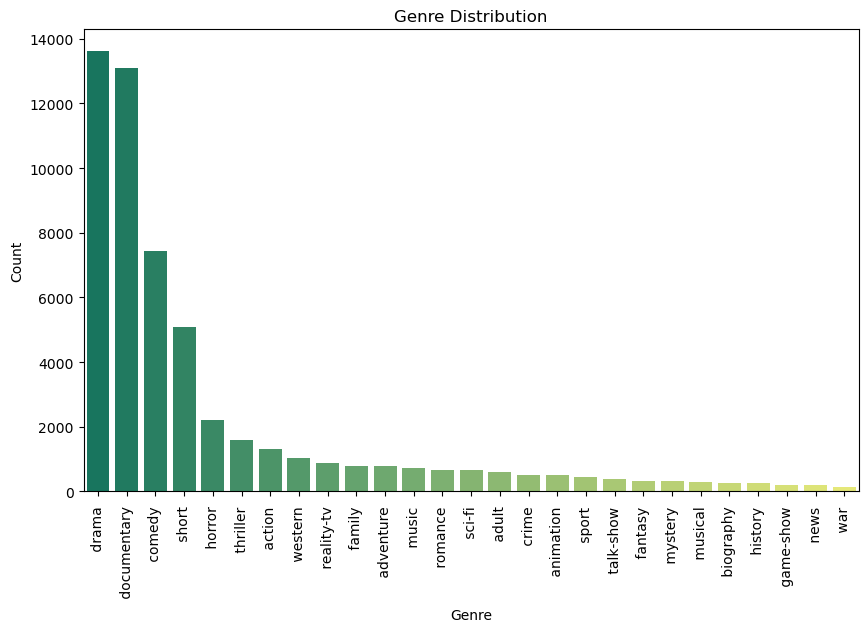

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df_train,palette='summer',order=df_train['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [20]:
df_train['num_char_D']= df_train['Description'].apply(len)
df_test['num_char_D']= df_test['Description'].apply(len)

In [21]:
df_train['num_char_T']= df_train['Title'].apply(len)
df_test['num_char_T']= df_test['Title'].apply(len)

In [22]:
#  number of words
df_train['num_words_D']= df_train['Description'].apply(lambda x:len(nltk.word_tokenize(x)))
df_test['num_words_D']= df_test['Description'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df_train['num_char_T']= df_train['Title'].apply(lambda x:len(nltk.word_tokenize(x)))
df_test['num_char_T']= df_test['Title'].apply(lambda x : len(nltk.word_tokenize(x)))

In [24]:
df_train.head()

,Title,Genre,Description,num_char_D,num_char_T,num_words_D
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,8,105
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,4,34
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,8,129
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,6,216
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,5,115


In [25]:
df_test.head()

,Title,Description,num_char_D,num_char_T,num_words_D
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",510,6,108
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",674,7,137
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,590,7,105
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",681,6,137
5,Er nu zhai (1955),Before he was known internationally as a mart...,814,6,169


In [26]:
df_train['num_sen_D']=df_train['Description'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_test['num_sen_D']=df_test['Description'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
import spacy

# Download the model
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [29]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

def transform_Description_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [30]:
df_train['transformed_Des']=df_train['Description'].apply(transform_Description_spacy)
df_test['transformed_Des']=df_test['Description'].apply(transform_Description_spacy)

In [31]:

import re

# Load spacy english language model
nlp=spacy.load('en_core_web_sm')

# define the preprocess_text function

def preprocess_text(Description):
  Description=Description.lower()
  Description=re.sub('[^a-zA-Z]',' ',Description)


  #  remove url
  Description=re.sub(r'http\S+', '', Description)
  #  remove special char and num
  Description=re.sub('[^a-zA-Z]',' ',Description)
  #  remove extra space
  Description=re.sub(' +',' ',Description)

   # Lemmatize using spaCy
  doc = nlp(Description)
  lemmatized_words = [token.lemma_ for token in doc]

    # Join the lemmatized words back into a string
  preprocessed_text = ' '.join(lemmatized_words)

  return preprocessed_text

In [32]:
# Apply the preprocess_text function to the 'Description' column
df_train['Cleaned_Des'] = df_train['Description'].apply(preprocess_text)
df_test['Cleaned_Des'] = df_test['Description'].apply(preprocess_text)

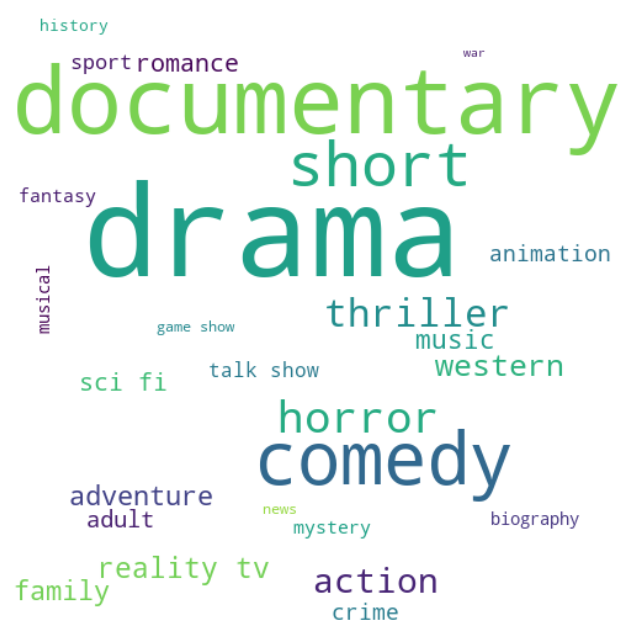

In [33]:
genre_text= ' '.join(df_train['Genre'])
wc=WordCloud(width=500,height=500,background_color='white',max_words=100).generate(genre_text)
plt.figure(figsize=(10,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()


In [38]:
x=tfidf.fit_transform(df_train['transformed_Des'])

In [39]:
tfv=TfidfVectorizer()

In [40]:
#  Fit and transform the training data
X_train = tfv.fit_transform(df_train['Description'])

# Transform the test data
X_test = tfv.transform(df_test['Description'])

In [41]:
# Split the data into training and validation sets
X = X_train
y = df_train['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44507977497002676
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.57      0.03      0.06      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.89      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0